In [74]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from ml_tooling import BaseClassModel
from ml_tooling.transformers import DFStandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV
import pandas as pd
import numpy as np

In [75]:
def get_boston_data(train=True):
    boston = load_boston()
    features = pd.DataFrame(data=boston.data, columns=boston.feature_names)
    if train:
        return features, np.log(boston.target)
    return features

In [76]:
class BostonData(BaseClassModel):
    def get_training_data(self):
        return get_boston_data()
    
    def get_prediction_data(self, idx):
        data = get_boston_data(train=False)
        return data.loc[idx]

In [77]:
df, target = get_boston_data()

In [78]:
linear = BostonData(LinearRegression())
result = linear.score_model()
result

[10:13:59] - Scoring model...
[10:13:59] - LinearRegression - r2: 0.7468248298131417


<Result LinearRegression: r2: 0.75 >

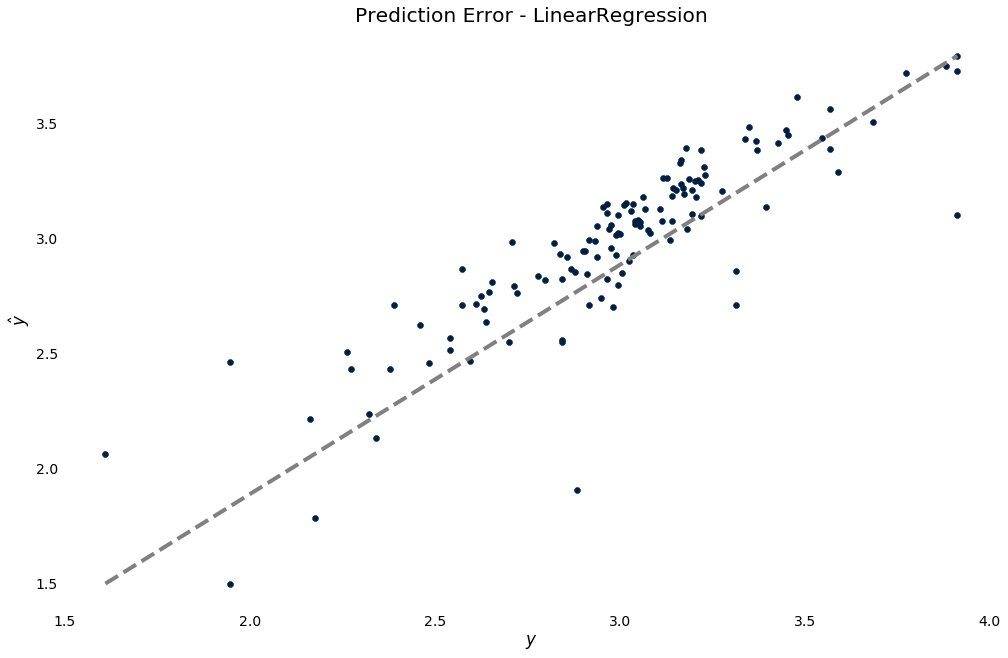

In [79]:
result.plot.prediction_error()

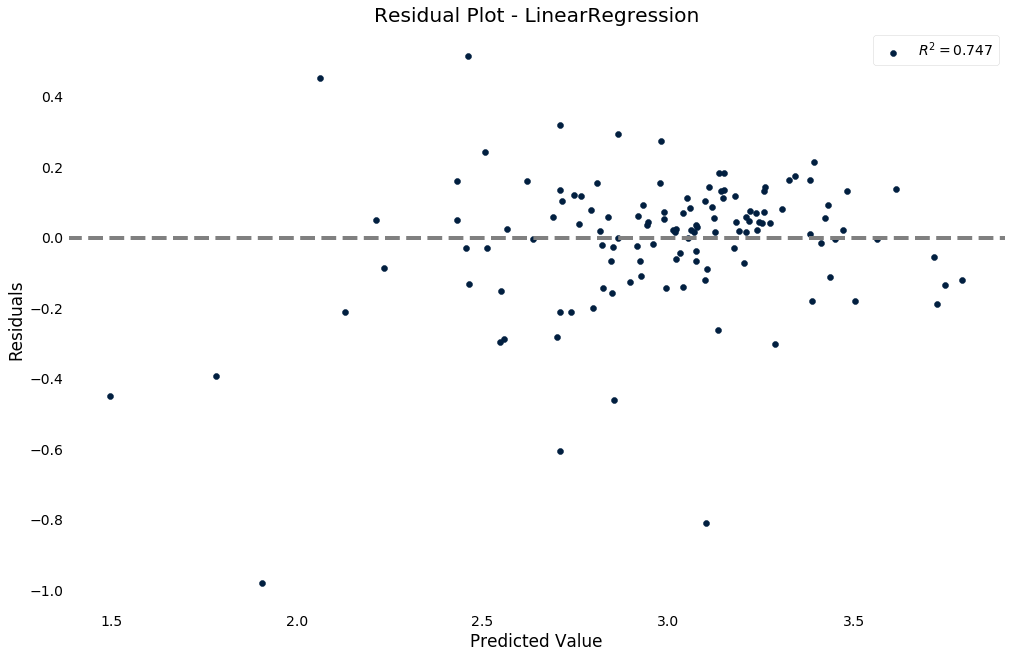

In [80]:
result.plot.residuals()

# Scaling

In [81]:
scaled = Pipeline([
    ('scale', DFStandardScaler()),
    ('model', LinearRegression())
])

In [82]:
scaled_linear = BostonData(scaled)
result = scaled_linear.score_model()
result

[10:14:08] - Scoring model...
[10:14:08] - LinearRegression - r2: 0.7468248298131496


<Result LinearRegression: r2: 0.75 >

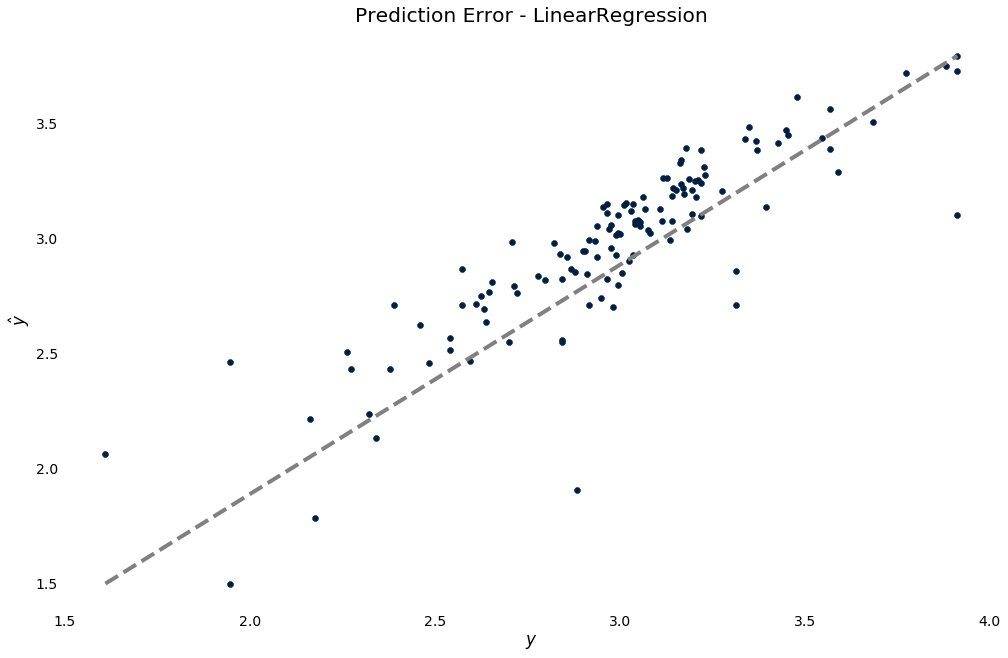

In [83]:
result.plot.prediction_error()

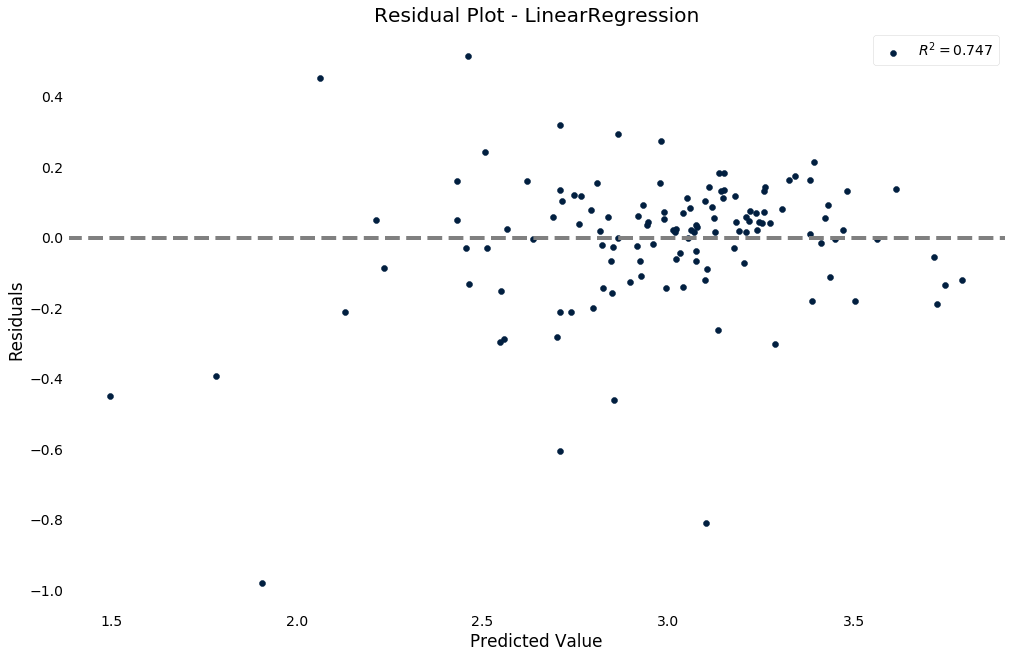

In [84]:
result.plot.residuals()

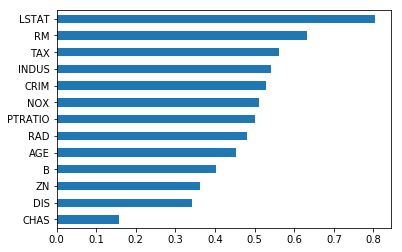

In [92]:
df.corrwith(pd.Series(target)).abs().sort_values().plot.barh()

In [40]:
from ml_tooling.transformers import Select

In [86]:
def create_pipeline(estimator):
    return Pipeline([
        ('select', Select(['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX', 'NOX',  'CRIM'])),
        ('scaler', DFStandardScaler()),
        ('estimator', estimator)
    ])

In [87]:
best_model, results = BostonData.test_models([create_pipeline(est) for est in [LinearRegression(), RidgeCV(cv=100), ElasticNetCV(cv=100)]])

[10:14:20] - Training model 1/3: LinearRegression
[10:14:20] - Scoring model...
[10:14:20] - LinearRegression - r2: 0.7093067216330452
[10:14:20] - Training model 2/3: RidgeCV
[10:14:20] - Scoring model...
[10:14:21] - RidgeCV - r2: 0.7118345374509629
[10:14:21] - Training model 3/3: ElasticNetCV
[10:14:21] - Scoring model...
[10:14:22] - ElasticNetCV - r2: 0.7096429925321545
[10:14:22] - Best model: RidgeCV - r2: 0.7118345374509629


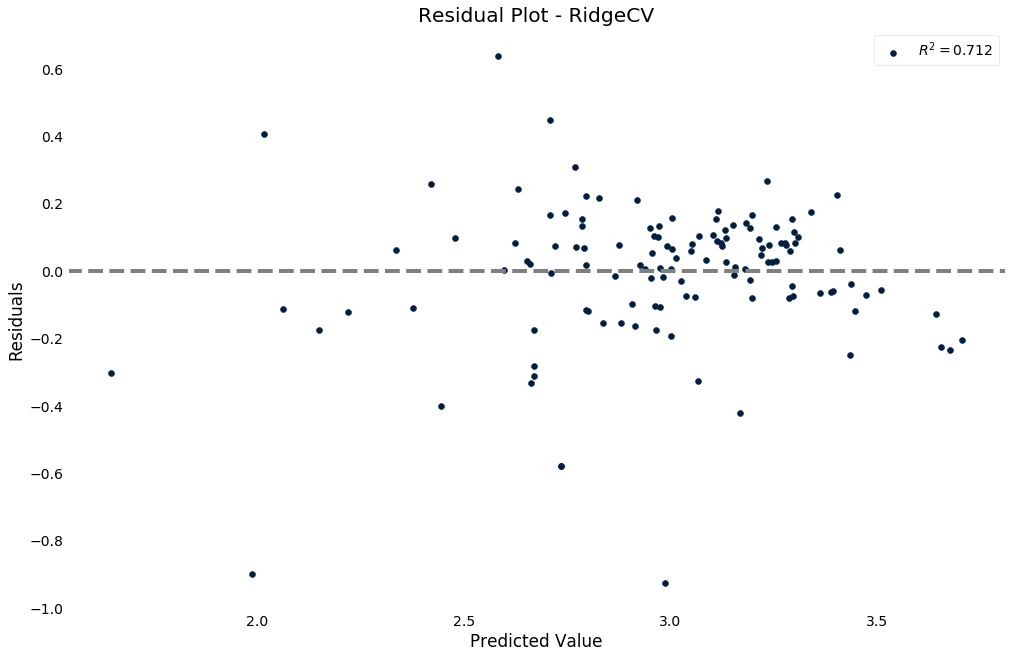

In [88]:
results.plot.residuals()

In [89]:
best_model.model.named_steps['estimator'].coef_

array([-0.20540134,  0.09404735, -0.06838742,  0.0278824 , -0.02643275,
       -0.02007056, -0.07268972])

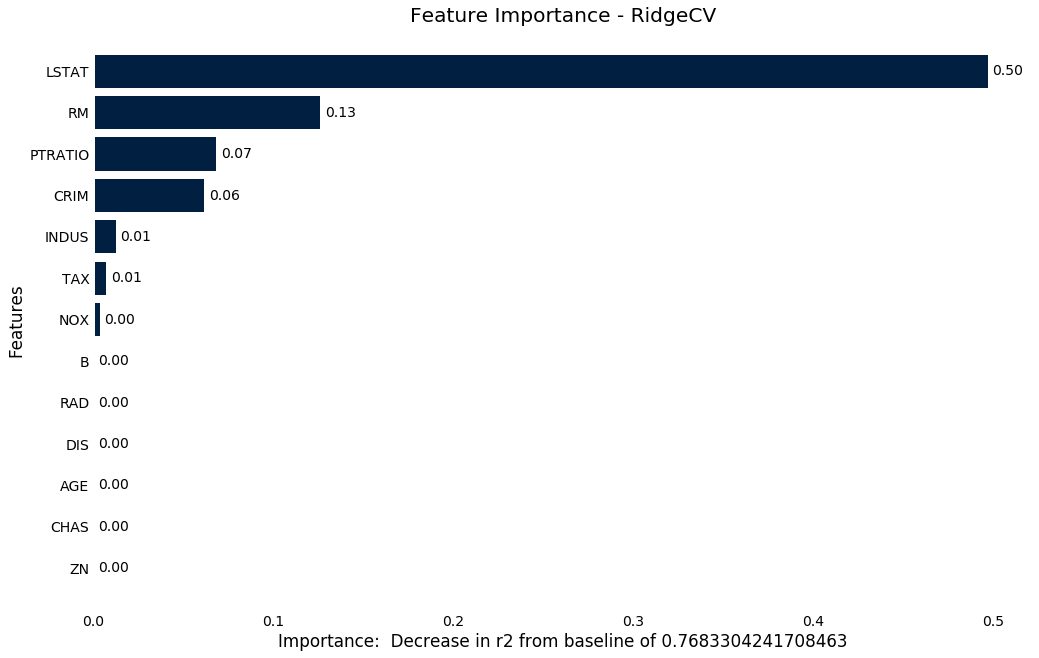

In [91]:
results.plot.feature_importance(1000)